In [1]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'


import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import sys

main_dir = "C:/Users/Aruay/Desktop/ra application/project/"

data = pd.read_csv(main_dir+'dataset/featureEMOVO.csv')

c:\Users\Aruay\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,gender,labels,speaker
0,-370.303223,58.331867,-7.632109,15.654898,3.273010,0.692397,-8.063744,5.894156,-5.199350,12.546567,...,34.036367,-0.028319,0.053574,-0.043633,-0.009186,0.019449,-0.007346,1,1,1
1,-374.553833,47.796314,1.653561,20.256063,-6.800525,0.783256,-4.250007,7.473405,-15.591282,14.261038,...,34.229551,0.023288,0.050375,-0.021473,0.040849,0.002533,0.025532,1,1,1
2,-386.473145,75.599594,-15.072874,6.823948,-1.835993,-4.165404,-10.107768,7.045069,-17.148949,11.959360,...,34.157690,0.013844,0.000709,-0.032024,-0.007825,0.018322,0.016368,1,1,1
3,-362.502167,89.977379,-15.514508,5.774208,4.361949,12.591103,-0.374380,-0.392911,-4.743288,15.702434,...,32.441757,0.002924,0.020344,-0.057423,0.041032,-0.014291,-0.002126,1,1,1
4,-412.010406,83.760246,-2.188665,18.547068,0.581788,10.956905,3.381726,3.320800,-9.278383,11.129302,...,33.286765,0.001819,0.007893,-0.003650,0.014794,0.000603,0.001663,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-428.723602,127.801125,15.011064,26.158209,-22.814543,10.531158,8.283092,-1.291359,-13.442948,11.084978,...,33.880198,-0.017768,0.023105,0.130201,0.076282,-0.008200,-0.029686,2,7,6
584,-433.270050,98.356888,24.055376,35.478432,-30.932493,11.173256,12.042026,-1.199043,-12.588658,7.034428,...,34.613071,-0.027987,-0.025462,-0.003617,0.090180,-0.020973,0.000550,2,7,6
585,-458.537323,104.085503,15.052121,37.028015,-10.172383,10.071804,2.412206,-3.682174,-7.252892,11.958858,...,34.431134,0.087554,0.064611,0.170886,-0.068005,0.058233,-0.019411,2,7,6
586,-523.336914,88.056267,18.831060,43.098541,-8.197763,15.856596,4.796964,4.109037,-4.488383,12.122023,...,33.439551,0.031808,-0.014211,0.000701,-0.059435,0.022520,0.021469,2,7,6


In [3]:
df = data
df

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,gender,labels,speaker
0,-370.303223,58.331867,-7.632109,15.654898,3.273010,0.692397,-8.063744,5.894156,-5.199350,12.546567,...,34.036367,-0.028319,0.053574,-0.043633,-0.009186,0.019449,-0.007346,1,1,1
1,-374.553833,47.796314,1.653561,20.256063,-6.800525,0.783256,-4.250007,7.473405,-15.591282,14.261038,...,34.229551,0.023288,0.050375,-0.021473,0.040849,0.002533,0.025532,1,1,1
2,-386.473145,75.599594,-15.072874,6.823948,-1.835993,-4.165404,-10.107768,7.045069,-17.148949,11.959360,...,34.157690,0.013844,0.000709,-0.032024,-0.007825,0.018322,0.016368,1,1,1
3,-362.502167,89.977379,-15.514508,5.774208,4.361949,12.591103,-0.374380,-0.392911,-4.743288,15.702434,...,32.441757,0.002924,0.020344,-0.057423,0.041032,-0.014291,-0.002126,1,1,1
4,-412.010406,83.760246,-2.188665,18.547068,0.581788,10.956905,3.381726,3.320800,-9.278383,11.129302,...,33.286765,0.001819,0.007893,-0.003650,0.014794,0.000603,0.001663,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-428.723602,127.801125,15.011064,26.158209,-22.814543,10.531158,8.283092,-1.291359,-13.442948,11.084978,...,33.880198,-0.017768,0.023105,0.130201,0.076282,-0.008200,-0.029686,2,7,6
584,-433.270050,98.356888,24.055376,35.478432,-30.932493,11.173256,12.042026,-1.199043,-12.588658,7.034428,...,34.613071,-0.027987,-0.025462,-0.003617,0.090180,-0.020973,0.000550,2,7,6
585,-458.537323,104.085503,15.052121,37.028015,-10.172383,10.071804,2.412206,-3.682174,-7.252892,11.958858,...,34.431134,0.087554,0.064611,0.170886,-0.068005,0.058233,-0.019411,2,7,6
586,-523.336914,88.056267,18.831060,43.098541,-8.197763,15.856596,4.796964,4.109037,-4.488383,12.122023,...,33.439551,0.031808,-0.014211,0.000701,-0.059435,0.022520,0.021469,2,7,6


In [5]:
data.iloc[:,-3] == 1

0       True
1       True
2       True
3       True
4       True
       ...  
583    False
584    False
585    False
586    False
587    False
Name: gender, Length: 588, dtype: bool

In [6]:
X_speaker = df.iloc[:, -1].copy()
X = df.iloc[:, :-3].copy()
y = df.iloc[:,-2].copy()

In [7]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-370.303223,58.331867,-7.632109,15.654898,3.273010,0.692397,-8.063744,5.894156,-5.199350,12.546567,...,17.334037,17.539159,17.562779,34.036367,-0.028319,0.053574,-0.043633,-0.009186,0.019449,-0.007346
1,-374.553833,47.796314,1.653561,20.256063,-6.800525,0.783256,-4.250007,7.473405,-15.591282,14.261038,...,16.263369,17.699334,19.162629,34.229551,0.023288,0.050375,-0.021473,0.040849,0.002533,0.025532
2,-386.473145,75.599594,-15.072874,6.823948,-1.835993,-4.165404,-10.107768,7.045069,-17.148949,11.959360,...,18.860587,18.714656,19.843059,34.157690,0.013844,0.000709,-0.032024,-0.007825,0.018322,0.016368
3,-362.502167,89.977379,-15.514508,5.774208,4.361949,12.591103,-0.374380,-0.392911,-4.743288,15.702434,...,15.868680,18.698590,19.053175,32.441757,0.002924,0.020344,-0.057423,0.041032,-0.014291,-0.002126
4,-412.010406,83.760246,-2.188665,18.547068,0.581788,10.956905,3.381726,3.320800,-9.278383,11.129302,...,16.198743,17.339091,18.793145,33.286765,0.001819,0.007893,-0.003650,0.014794,0.000603,0.001663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-428.723602,127.801125,15.011064,26.158209,-22.814543,10.531158,8.283092,-1.291359,-13.442948,11.084978,...,16.535757,15.881800,18.443654,33.880198,-0.017768,0.023105,0.130201,0.076282,-0.008200,-0.029686
584,-433.270050,98.356888,24.055376,35.478432,-30.932493,11.173256,12.042026,-1.199043,-12.588658,7.034428,...,16.113687,16.514813,18.799787,34.613071,-0.027987,-0.025462,-0.003617,0.090180,-0.020973,0.000550
585,-458.537323,104.085503,15.052121,37.028015,-10.172383,10.071804,2.412206,-3.682174,-7.252892,11.958858,...,14.285399,16.010688,18.472471,34.431134,0.087554,0.064611,0.170886,-0.068005,0.058233,-0.019411
586,-523.336914,88.056267,18.831060,43.098541,-8.197763,15.856596,4.796964,4.109037,-4.488383,12.122023,...,14.503504,15.854289,17.343597,33.439551,0.031808,-0.014211,0.000701,-0.059435,0.022520,0.021469


In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
583    7
584    7
585    7
586    7
587    7
Name: labels, Length: 588, dtype: int64

In [9]:
X_speaker

0      1
1      1
2      1
3      1
4      1
      ..
583    6
584    6
585    6
586    6
587    6
Name: speaker, Length: 588, dtype: int64

In [10]:
X.shape, y.shape

((588, 193), (588,))

In [11]:
from sklearn.utils import shuffle

X, y, X_speaker = shuffle(X, y, X_speaker, random_state=42)

In [12]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
520,-439.877838,117.321014,10.602578,53.040016,-4.946937,-10.770016,-5.771697,17.070696,-17.127470,14.370298,...,18.117469,17.401571,21.602878,35.671832,-0.005895,-0.022650,-0.132363,0.049466,-0.037700,0.016853
284,-613.218201,79.652763,24.584206,37.949673,1.303124,16.579773,-8.718364,11.269353,-3.792958,9.365495,...,14.820180,14.985934,16.305271,32.239479,-0.002455,-0.038473,0.059378,-0.048145,-0.012380,-0.030787
512,-382.072449,99.270081,-16.367687,46.884605,-2.707903,-3.444504,-9.321061,0.495585,-20.801884,8.907002,...,16.473369,17.277710,22.031331,35.046789,-0.036587,-0.011144,-0.023345,0.071361,0.003024,0.012663
331,-298.340240,126.548904,-10.493296,36.402939,-4.145329,13.791401,-4.560700,-8.711471,-17.640871,10.289538,...,15.301422,16.801280,20.275452,35.618515,0.072802,0.000520,0.056936,0.024482,0.028216,-0.025275
210,-379.341125,70.008835,-12.896812,39.299896,-11.633016,-17.463478,-29.510290,7.575838,-13.484573,10.387331,...,19.257797,16.833698,20.816486,35.371043,-0.012019,-0.010856,0.022709,0.019710,0.024126,0.012241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-483.981812,48.379009,14.355464,43.422832,-13.121336,-6.838452,-2.321568,14.630364,-14.400576,-1.943750,...,17.188606,17.620220,18.394488,33.857580,0.019633,0.047134,-0.041484,-0.017645,0.009781,0.021665
106,-344.833313,72.097519,-15.943831,36.209465,-5.945903,-10.347607,-26.619682,-1.246971,-12.959381,-1.500720,...,19.143630,19.550646,18.435443,35.547995,0.024208,-0.016256,0.009379,-0.058329,-0.003104,-0.028892
270,-372.491058,94.188080,-21.024170,9.422773,-15.271385,-12.616859,-24.407717,-11.172367,-18.123978,5.479527,...,18.217055,18.122454,20.140428,34.772376,0.017319,0.041060,-0.076976,-0.037609,0.009241,0.028595
435,-349.230408,58.877884,1.832725,47.528156,19.937859,19.438406,-15.465796,9.019450,-7.639285,6.787797,...,15.013859,17.452234,17.375113,33.325607,0.015394,0.022941,0.018558,-0.029272,0.005829,-0.016926


In [13]:
X_speaker

520    6
284    3
512    6
331    4
210    3
      ..
71     1
106    2
270    3
435    5
102    2
Name: speaker, Length: 588, dtype: int64

In [14]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = to_categorical(lb.fit_transform(y))

In [15]:
y1

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
X.shape, y1.shape

((588, 193), (588, 7))

In [17]:
X2_speaker = X_speaker.copy().to_numpy()
X2=X.copy().to_numpy()
y2=y.copy().to_numpy()

In [18]:
X2.shape, X2_speaker.shape, y2.shape

((588, 193), (588,), (588,))

In [28]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM

from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(256, 5,padding='same',))

    model.add(Activation('relu'))

    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #model.add(Conv1D(128, 5,padding='same',))
    #model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #model.summary()
    return model

In [20]:
import random, numpy as np
from keras import optimizers
kfold=5
def create_index(kfold, size):
    a = []
    for i in range(size):
        a.append(i)
    random.shuffle(a)
    arr = np.array(a)
    return arr.reshape(kfold, size//kfold)

In [21]:
X3=pd.DataFrame(X2)
X3

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-439.877838,117.321014,10.602578,53.040016,-4.946937,-10.770016,-5.771697,17.070696,-17.127470,14.370298,...,18.117469,17.401571,21.602878,35.671832,-0.005895,-0.022650,-0.132363,0.049466,-0.037700,0.016853
1,-613.218201,79.652763,24.584206,37.949673,1.303124,16.579773,-8.718364,11.269353,-3.792958,9.365495,...,14.820180,14.985934,16.305271,32.239479,-0.002455,-0.038473,0.059378,-0.048145,-0.012380,-0.030787
2,-382.072449,99.270081,-16.367687,46.884605,-2.707903,-3.444504,-9.321061,0.495585,-20.801884,8.907002,...,16.473369,17.277710,22.031331,35.046789,-0.036587,-0.011144,-0.023345,0.071361,0.003024,0.012663
3,-298.340240,126.548904,-10.493296,36.402939,-4.145329,13.791401,-4.560700,-8.711471,-17.640871,10.289538,...,15.301422,16.801280,20.275452,35.618515,0.072802,0.000520,0.056936,0.024482,0.028216,-0.025275
4,-379.341125,70.008835,-12.896812,39.299896,-11.633016,-17.463478,-29.510290,7.575838,-13.484573,10.387331,...,19.257797,16.833698,20.816486,35.371043,-0.012019,-0.010856,0.022709,0.019710,0.024126,0.012241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-483.981812,48.379009,14.355464,43.422832,-13.121336,-6.838452,-2.321568,14.630364,-14.400576,-1.943750,...,17.188606,17.620220,18.394488,33.857580,0.019633,0.047134,-0.041484,-0.017645,0.009781,0.021665
584,-344.833313,72.097519,-15.943831,36.209465,-5.945903,-10.347607,-26.619682,-1.246971,-12.959381,-1.500720,...,19.143630,19.550646,18.435443,35.547995,0.024208,-0.016256,0.009379,-0.058329,-0.003104,-0.028892
585,-372.491058,94.188080,-21.024170,9.422773,-15.271385,-12.616859,-24.407717,-11.172367,-18.123978,5.479527,...,18.217055,18.122454,20.140428,34.772376,0.017319,0.041060,-0.076976,-0.037609,0.009241,0.028595
586,-349.230408,58.877884,1.832725,47.528156,19.937859,19.438406,-15.465796,9.019450,-7.639285,6.787797,...,15.013859,17.452234,17.375113,33.325607,0.015394,0.022941,0.018558,-0.029272,0.005829,-0.016926


In [22]:
X3_speaker = pd.DataFrame(X2_speaker)
X3_speaker

,0
0,6
1,3
2,6
3,4
4,3
...,...
583,1
584,2
585,3
586,5


In [23]:
speakers = X_speaker.unique()
speakers

array([6, 3, 4, 1, 2, 5], dtype=int64)

In [24]:
X3_col = X3_speaker.rename(columns={0: 'speaker'})
X3_col

,speaker
0,6
1,3
2,6
3,4
4,3
...,...
583,1
584,2
585,3
586,5


In [25]:
X_combined = pd.concat([X3, X3_col], axis=1)
X_combined

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,speaker
0,-439.877838,117.321014,10.602578,53.040016,-4.946937,-10.770016,-5.771697,17.070696,-17.127470,14.370298,...,17.401571,21.602878,35.671832,-0.005895,-0.022650,-0.132363,0.049466,-0.037700,0.016853,6
1,-613.218201,79.652763,24.584206,37.949673,1.303124,16.579773,-8.718364,11.269353,-3.792958,9.365495,...,14.985934,16.305271,32.239479,-0.002455,-0.038473,0.059378,-0.048145,-0.012380,-0.030787,3
2,-382.072449,99.270081,-16.367687,46.884605,-2.707903,-3.444504,-9.321061,0.495585,-20.801884,8.907002,...,17.277710,22.031331,35.046789,-0.036587,-0.011144,-0.023345,0.071361,0.003024,0.012663,6
3,-298.340240,126.548904,-10.493296,36.402939,-4.145329,13.791401,-4.560700,-8.711471,-17.640871,10.289538,...,16.801280,20.275452,35.618515,0.072802,0.000520,0.056936,0.024482,0.028216,-0.025275,4
4,-379.341125,70.008835,-12.896812,39.299896,-11.633016,-17.463478,-29.510290,7.575838,-13.484573,10.387331,...,16.833698,20.816486,35.371043,-0.012019,-0.010856,0.022709,0.019710,0.024126,0.012241,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-483.981812,48.379009,14.355464,43.422832,-13.121336,-6.838452,-2.321568,14.630364,-14.400576,-1.943750,...,17.620220,18.394488,33.857580,0.019633,0.047134,-0.041484,-0.017645,0.009781,0.021665,1
584,-344.833313,72.097519,-15.943831,36.209465,-5.945903,-10.347607,-26.619682,-1.246971,-12.959381,-1.500720,...,19.550646,18.435443,35.547995,0.024208,-0.016256,0.009379,-0.058329,-0.003104,-0.028892,2
585,-372.491058,94.188080,-21.024170,9.422773,-15.271385,-12.616859,-24.407717,-11.172367,-18.123978,5.479527,...,18.122454,20.140428,34.772376,0.017319,0.041060,-0.076976,-0.037609,0.009241,0.028595,3
586,-349.230408,58.877884,1.832725,47.528156,19.937859,19.438406,-15.465796,9.019450,-7.639285,6.787797,...,17.452234,17.375113,33.325607,0.015394,0.022941,0.018558,-0.029272,0.005829,-0.016926,5


In [26]:
# Get top 5 speakers with the most data

speaker_counts = X_combined['speaker'].value_counts()
selected_speakers = speaker_counts.head(5).index.to_numpy()

print("Selected speakers:", selected_speakers)

Selected speakers: [6 3 4 1 2]


In [29]:
from skfeature.function.similarity_based import fisher_score

hist=[]
scores=[]
totalsize=585
num_fea=125
a=create_index(kfold,totalsize)

for i in range (kfold):
    model_name = 'Model_'+str(i)
    savedir='emovo_speaker_both'
    model_path = os.path.join(savedir, (model_name+'.h5'))

    # Choose one test speaker from selected_speakers
    test_speaker = selected_speakers[i]

    # Use only speakers not in selected_speakers as training
    train_speakers = np.setdiff1d(speakers, [test_speaker])

    print(f"Fold {i+1}")
    print("Test speaker:", test_speaker)
    print("Train speakers:", train_speakers)

    # Get the indices for test and train
    train_indices = X_combined[X_combined['speaker'].isin(train_speakers)].index
    test_indices = X_combined[X_combined['speaker'] == test_speaker].index


    # Sanity check for overlaps
    overlap_indices = np.intersect1d(train_indices, test_indices)
    if len(overlap_indices) > 0:
        print(f"Overlap found in fold {i}! Overlapping indices: {overlap_indices}")
    else:
        print(f"No overlap in fold {i}.")

    
    # Prepare training and testing sets
    X_train = X_combined.drop(columns=['speaker']).iloc[train_indices, :]
    y_train = y1[train_indices, :]
    y_fs_train = y.iloc[train_indices]

    X_test = X_combined.drop(columns=['speaker']).iloc[test_indices, :]
    y_test = y1[test_indices, :]


    # fisher score
    X_fs = X_train.copy().to_numpy()
    X_test_fs = X_test.copy().to_numpy()
    y_fs = y_fs_train.copy().to_numpy()

    score  = fisher_score.fisher_score(X_fs, y_fs)
    sorted_indices = np.argsort(score)[::-1]
    fs_indices = sorted_indices[:num_fea]

    print("Selected FS indices:", fs_indices)
    
    selected_features_train = X_fs[:,fs_indices]
    selected_features_test = X_test_fs[:,fs_indices]

    X_train_s = pd.DataFrame(selected_features_train)
    X_test_s = pd.DataFrame(selected_features_test)

    x_traincnn =np.expand_dims(X_train_s, axis=2)
    x_testcnn= np.expand_dims(X_test_s, axis=2)

    m1= model1(x_traincnn.shape[1])
    opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00005, decay=1e-6)
    m1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(i)


    from keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=200, restore_best_weights=True)

    hist.append(m1.fit(x_traincnn, y_train, batch_size=32, epochs=700, validation_data=(x_testcnn, y_test), callbacks=[early_stopping]))
    scores.append(m1.evaluate(x_testcnn, y_test, verbose=0))

    np.save((savedir+'/X'+str(i)),x_testcnn)
    np.save((savedir+'/y'+str(i)),y_test)

    model_json = m1.to_json()
    with open((savedir+model_name+'.json'), "w") as json_file:
        json_file.write(model_json)
    m1.save(model_path)

Fold 1
Test speaker: 6
Train speakers: [1 2 3 4 5]
No overlap in fold 0.
Selected FS indices: [ 16  21   0  82   4  36  27  61  25  58  99  41  49 139  98 145 176 129
  42  52  31  68  45  59  54  74 109 119 189 184 190 178 182 107 122  77
 124 155 141 162  89  47  43  33 102  76  78 117 138 143 174 104 165 188
  87  84 148  94  92  97 173 187 183 108 123 114  88  96 136 167 177 186
 185 153 115 106 100  93  71  81 128  60  70  75  63  79  95 161 171 152
 180 137 158 111 125 118 146 147  83 126 170  66  46  38  65  80 103  85
  69  53  51 105  62  55  50  48  67  64  57  40  39  37  44  28  17]
0
Epoch 1/700
16/16 [==============================] - 4s 141ms/step - loss: 2.1137 - accuracy: 0.1878 - val_loss: 2.3158 - val_accuracy: 0.1429
Epoch 2/700
16/16 [==============================] - 2s 100ms/step - loss: 1.9751 - accuracy: 0.2388 - val_loss: 2.1092 - val_accuracy: 0.1429
Epoch 3/700
16/16 [==============================] - 1s 91ms/step - loss: 1.8991 - accuracy: 0.2551 - val_loss

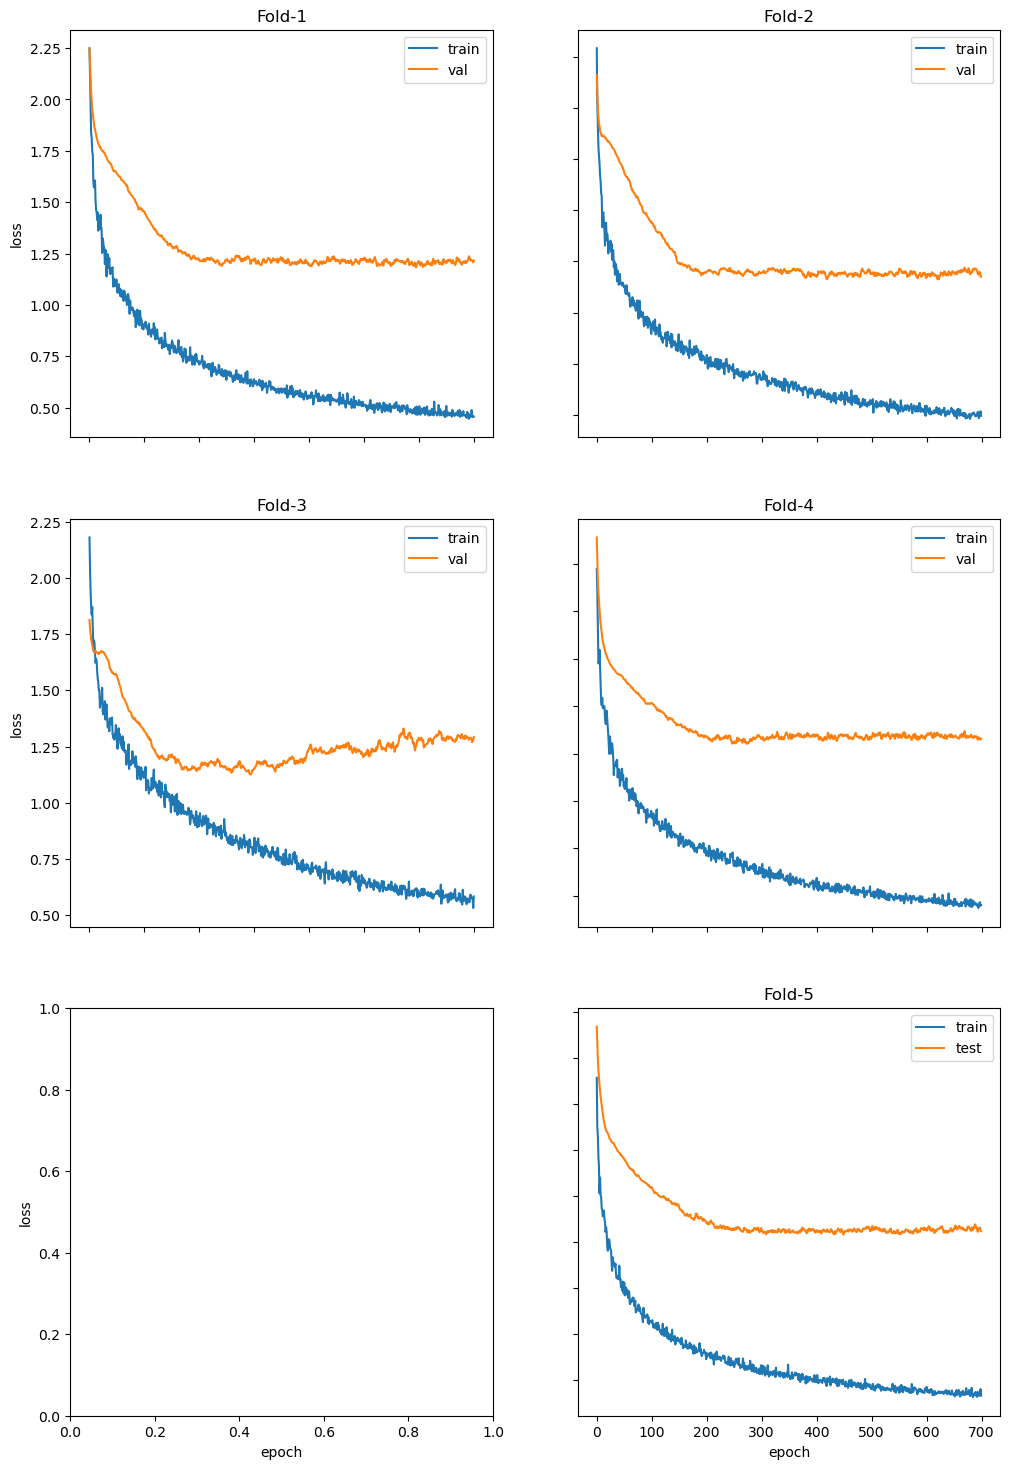

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2,figsize=(12,18))
axs[0, 0].plot(hist[0].history['loss'])
axs[0, 0].plot(hist[0].history['val_loss'])
axs[0, 0].set_title('Fold-1')
axs[0, 0].legend(['train', 'val'], loc='upper right')

axs[0, 1].plot(hist[1].history['loss'])
axs[0, 1].plot(hist[1].history['val_loss'])
axs[0, 1].set_title('Fold-2')
axs[0, 1].legend(['train', 'val'], loc='upper right')

axs[1, 0].plot(hist[2].history['loss'])
axs[1, 0].plot(hist[2].history['val_loss'])
axs[1, 0].set_title('Fold-3')
axs[1, 0].legend(['train', 'val'], loc='upper right')

axs[1, 1].plot(hist[3].history['loss'])
axs[1, 1].plot(hist[3].history['val_loss'])
axs[1, 1].set_title('Fold-4')
axs[1, 1].legend(['train', 'val'], loc='upper right')

axs[2, 1].plot(hist[4].history['loss'])
axs[2, 1].plot(hist[4].history['val_loss'])
axs[2, 1].set_title('Fold-5')
axs[2, 1].legend(['train', 'test'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.savefig('emodbFemale_4Folds_65.png')

In [48]:
# loading json and creating model
from keras.models import model_from_json
savedir='emovo_speaker_both'
m='Model_2'

json_file = open(savedir+m+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(savedir + '/' + m + '.h5')
print("Loaded model from disk")

Loaded model from disk


In [49]:
import numpy as np
import tensorflow as tf
import keras
opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)

Xloaded=np.load(savedir+'/X2.npy')
yloaded=np.load(savedir+'/y2.npy')
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(Xloaded, yloaded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 48.98%


Fold 0: 26.67%

Fold 1: 36.73%

Fold 2: 48.98%

Fold 3: 28.57%

Fold 4: 29.59%

In [50]:
import pandas as pd
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(Xloaded)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
    yy.append(np.argmax(j))
print(len(yy))

##önemli
for j in yloaded:
    ya.append(np.argmax(j))

cm=confusion_matrix(ya, yy)
cm

4/4 [==============================] - 0s 15ms/step
(98, 7)
98


array([[ 0,  1,  0,  0,  0,  7,  6],
       [ 0,  7,  0,  1,  5,  1,  0],
       [ 0,  8,  0,  0,  1,  2,  3],
       [ 0,  0,  0,  7,  1,  1,  5],
       [ 0,  0,  0,  0, 13,  0,  1],
       [ 0,  1,  0,  2,  0,  7,  4],
       [ 0,  0,  0,  0,  0,  0, 14]], dtype=int64)

In [51]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy) , dtype=float)
for it in range(0, 7):
    sumik = np.sum(array[it])
    for it2 in range(0, 7):
        array[it][it2] = round(array[it][it2] * (100.0/sumik) ,1)
print(array)

[[  0.    7.1   0.    0.    0.   50.   42.9]
 [  0.   50.    0.    7.1  35.7   7.1   0. ]
 [  0.   57.1   0.    0.    7.1  14.3  21.4]
 [  0.    0.    0.   50.    7.1   7.1  35.7]
 [  0.    0.    0.    0.   92.9   0.    7.1]
 [  0.    7.1   0.   14.3   0.   50.   28.6]
 [  0.    0.    0.    0.    0.    0.  100. ]]


     dis   gio  neu   pau   rab   sor    tri
dis  0.0   7.1  0.0   0.0   0.0  50.0   42.9
gio  0.0  50.0  0.0   7.1  35.7   7.1    0.0
neu  0.0  57.1  0.0   0.0   7.1  14.3   21.4
pau  0.0   0.0  0.0  50.0   7.1   7.1   35.7
rab  0.0   0.0  0.0   0.0  92.9   0.0    7.1
sor  0.0   7.1  0.0  14.3   0.0  50.0   28.6
tri  0.0   0.0  0.0   0.0   0.0   0.0  100.0



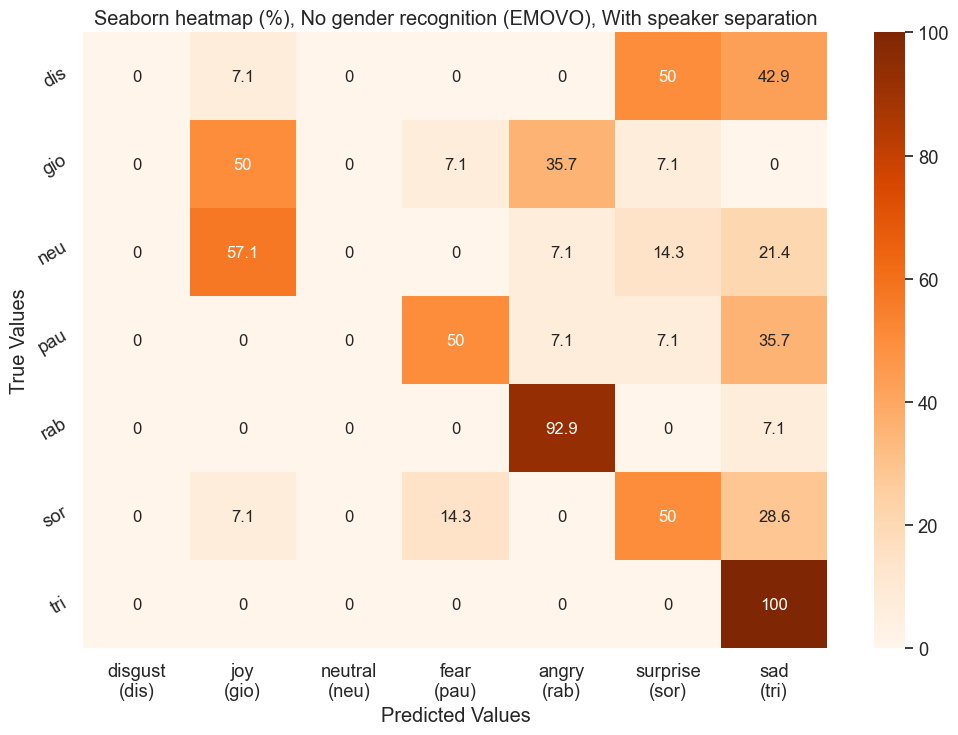

In [53]:
listik = ['dis', 'gio', 'neu', 'pau', 'rab', 'sor', 'tri']

df_cm1 = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm1)
print()
plt.figure(figsize = (12,8))
plt.title('Seaborn heatmap (%), No gender recognition (EMOVO), With speaker separation')
sn.set(font_scale=1.2)
aa=sn.heatmap(df_cm1, annot=True, cmap="Oranges", fmt='g', annot_kws={"size": 12})
aa.set_xticklabels(['disgust\n(dis)', 'joy\n(gio)', 'neutral\n(neu)','fear\n(pau)', 'angry\n(rab)', 'surprise\n(sor)', 'sad\n(tri)'])
aa.set_yticklabels(df_cm1,rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig('EmodbFemale_65.png')
plt.show()